<a href="https://colab.research.google.com/github/maleehahassan/NNBuildingBlocksTeachingPt1/blob/main/notebooks/NNBuildingBlocksPt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project: Training a Neuron to Classify Flowers**

Objective: Build a complete neural network from scratch (a small one) that can learn to separate two classes of Iris flowers. Let's learn together!

**Step 1: Overview of the problem**

First, we need data. We'll use a small, famous dataset about Iris flowers. Our goal is to train a neuron to differentiate between two species, Iris Setosa and Iris Versicolor, based on their petal length and petal width.

This is a classic supervised learning problem: we have input features (X, the petal measurements) and corresponding correct labels (y, the species). Let's load and visualize the data to see what we're working with.

In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt

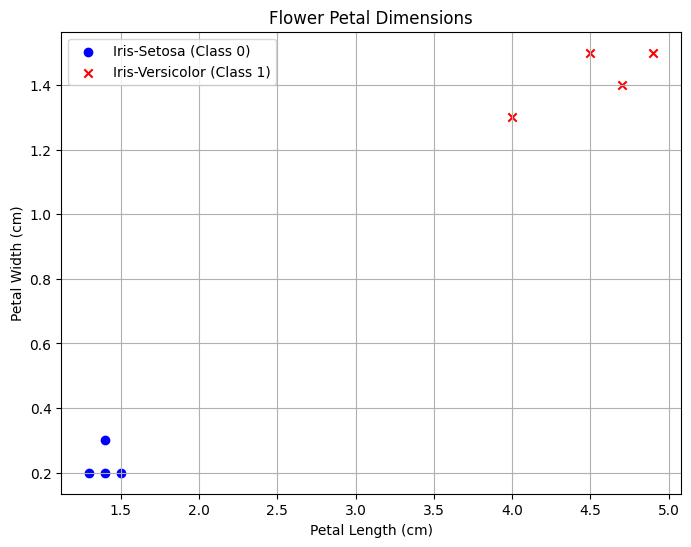

In [ ]:
#defining data for flower classification
# features (X) = [petal length, petal width]
# labels (y) = 0 for Iris-Setosa and 1 for Iris-Versicolor

X = np.array([
    [1.4, 0.2], [1.3, 0.2], [1.5, 0.2], [1.4, 0.3], # Iris-Setosa
    [4.7, 1.4], [4.5, 1.5], [4.9, 1.5], [4.0, 1.3]  # Iris-Versicolor
])

y = np.array([0,0,0,0,1,1,1,1])

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:4, 0], X[:4, 1], color='blue', marker='o', label='Iris-Setosa (Class 0)')
plt.scatter(X[4:, 0], X[4:, 1], color='red', marker='x', label='Iris-Versicolor (Class 1)')
plt.title('Flower Petal Dimensions')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()

**Step 2 and 3: A Perceptron with a Sigmoid Activation Function**

Our data points look separable by a straight line. A Perceptron is the perfect model for this! It will learn to draw that line.

The classic perceptron uses a step function. However, for a smoother learning process, we'll use the Sigmoid function. It squashes the output between 0 and 1, which we can interpret as the probability of a flower being an Iris-Versicolor.

In [ ]:
# Define the sigmoid activation function
def sigmoid(x):
    return #your code here

# Let's initialize our Perceptron's parameters randomly
np.random.seed(42) # for reproducibility

# select the number of weights and bias
weights = np.random.rand(#your code here)
bias = np.random.rand(#your code here)

print(f"Initial Weights: {weights}")
print(f"Initial Bias: {bias}")

**Step 4: Loss function Mean Squared Error (MSE)**

How do we know if our model is doing well? We need a loss function to measure its error. We'll use the Mean Squared Error (MSE), which calculates the average of the squared differences between the true labels (y_true) and our model's predictions (y_pred).

The goal of training is to adjust the weights and bias to make this MSE value as low as possible.



In [ ]:
def mean_squared_error(y_true, y_pred):
  return #your code here

**Step 5: Training**

Let's make the model learn. Show the data to the model again and again (epoch). in each epoch the model:

* Makes a prediction for each flower.

* Calculates the loss.

* Updates the weights and bias in the direction that reduces the loss (this is a simplified version of gradient descent).



In [ ]:
# Training parameters
learning_rate = 0.1
epochs = 100
losses = []

# The Training Loop
for epoch in range(epochs):
    # 1. Make predictions
    weighted_sum = #your code here
    predictions = #your code here

    # 2. Calculate the loss
    loss = mean_squared_error(y, predictions)
    losses.append(loss)

    # 3. Calculate the error and update weights/bias
    error = #your code here
    d_predictions = #your code here

    # Calculate gradients
    d_weights = #your code here
    d_bias = #your code here

    # Update parameters
    weights += learning_rate * d_weights
    bias += learning_rate * d_bias

    # Print progress
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

print("\n--- Training Finished ---")
print(f"Final Weights: {weights}")
print(f"Final Bias: {bias}")

# Plot the training loss
plt.figure(figsize=(8, 6))
plt.plot(losses)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

**Step 6: Visualizing the results**

Our model has now learned a set of weights and a bias. Together, these define a line called "decision boundary" that separates the two flower classes. Let's plot this line on our original data to see how well our neuron learned!

In [ ]:
# Plot the original data again
plt.figure(figsize=(8, 6))
plt.scatter(X[:4, 0], X[:4, 1], color='blue', marker='o', label='Iris-Setosa (Class 0)')
plt.scatter(X[4:, 0], X[4:, 1], color='red', marker='x', label='Iris-Versicolor (Class 1)')

# Calculate and plot the decision boundary
# The line is where weighted_sum = 0, so np.dot(x, w) + b = 0
# w1*x1 + w2*x2 + b = 0  => x2 = (-w1/w2)*x1 - (b/w2)
x1_line = np.linspace(1, 5, 100)
x2_line = (-weights[0] / weights[1]) * x1_line - (bias / weights[1])

plt.plot(x1_line, x2_line, 'k-', label='Learned Decision Boundary')
plt.title('Final Classification Result')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.xlim(1.2, 5.1)
plt.ylim(0.1, 1.7)
plt.legend()
plt.grid(True)
plt.show()